In [4]:
import pandas as pd
import numpy as np
import nltk
import spacy
pd.set_option('display.max_colwidth', -1)
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from textblob import TextBlob


In [5]:
news=pd.read_csv("news_en.csv")
print("Shape od data :",news.shape)

Shape od data : (40062, 5)


In [5]:
news.head()

id                                                             Headline  \
0  0   Survivors of Florida school shooting launch gun control push          
1  1   VW bid to delay first U.S. diesel emissions trial rejected            
2  2   Lawyer pleads guilty to lying to U.S. investigators in Russia probe   
3  3   Syria pro-government forces enter Afrin to aid Kurds against Turkey   
4  4   More bombs hit Syria's Ghouta, death toll highest since 2013          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## The Kat field, which is the category is not in english. Let us map it to english language category

In [6]:
news['Kat'].value_counts()

Weltnachrichten       19776
Top-Nachrichten       8452 
Politik               7652 
Inlandsnachrichten    4180 
Breakingviews         2    
Name: Kat, dtype: int64

In [7]:
cat_mapping={'Weltnachrichten':'World News',
'Top-Nachrichten': 'Top News',
            'Politik':'Politics',
            'Inlandsnachrichten':'Local News',
            'Breakingviews':'Breaking Views'}

In [8]:
news=news.replace({'Kat':cat_mapping})
news.head(2)

id                                                      Headline  \
0  0   Survivors of Florida school shooting launch gun control push   
1  1   VW bid to delay first U.S. diesel emissions trial rejected     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [9]:
news=news.rename(columns={'Kat':'category'})

### What are the most common Words used in Headlines and what is the average number of words used in Headline?

To get the frequent words used in Headlines, we will have to first tokenise the headlines and create a vocabulary and calculate the Frequency of the word in the corpus. We will also have to remove stop words and apply lematization.

In [10]:
headlines=news['Headline'].tolist()
headlines[0:10]

['Survivors of Florida school shooting launch gun control push',
 'VW bid to delay first U.S. diesel emissions trial rejected',
 'Lawyer pleads guilty to lying to U.S. investigators in Russia probe',
 'Syria pro-government forces enter Afrin to aid Kurds against Turkey',
 "More bombs hit Syria's Ghouta, death toll highest since 2013",
 "Bitcoin nearly doubles in value from year's low hit in early February",
 'Supreme Court snubs challenge to California gun waiting period',
 'Wall Street winning streak ends as Walmart drags on Dow, S&P',
 'Student survivor in Florida puts her dreams on hold to demand change',
 'New corruption cases entangle Netanyahu aides']

In [11]:
nlp = spacy.load('en')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
def preprocess(document):
    
    document = document.lower()
    document = nlp(document)
    words=[word.lemma_ for word in document if not word.is_stop]
    document=" ".join(words)
    #words = document.split()

    #words = [word for word in words if word not in stopwords.words("english")]
    
    #document = " ".join(words)
    #words=[(token.lemma_) for token in nlp(document)]
    #document = " ".join(words)
    return document

In [12]:
headlines=[preprocess(headline) for headline in headlines]
headlines[0]

'survivor florida school shoot launch gun control push'

### Let us build a simple BoW model using sklearn Count Vectoriser and get the vocabulary and the most frequent words

In [13]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(headlines)

In [14]:
headlines_bow=pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

In [15]:
headlines_bow.shape

(40062, 14258)

In [16]:
print("Unique Words used in the Headlines :",headlines_bow.shape[1])

Unique Words used in the Headlines : 14258


In [17]:
freq=pd.DataFrame(headlines_bow.sum(axis=0).reset_index().rename(columns={'index':'word',0:'Frequency'}))

In [18]:
freq.head()

,word,Frequency
0,000,295
1,000th,2
2,01,2
3,0111,1
4,02,2


In [19]:
freq_top_20=freq.nlargest(20,'Frequency')

Text(0.5,1,'Top twenty most frequent words in Headlines')

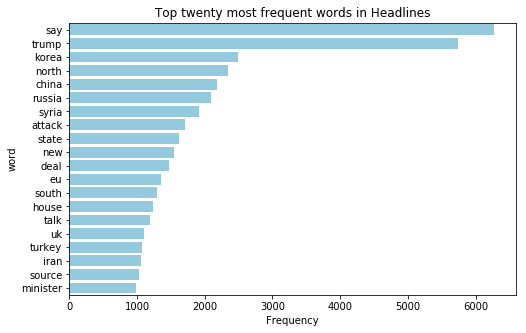

In [20]:
plt.figure(figsize=(8,5))

sns.barplot(y=freq_top_20['word'],x=freq_top_20['Frequency'],color="skyblue").set_title("Top twenty most frequent words in Headlines")

Trump and say seem to occur a lot in the headlines - do they occur together ?? There is also mention of North and South Korea Deal. '
### Let us look at the most common Bigram used

In [21]:
bigram_vectoriser=CountVectorizer(headlines,ngram_range=(2,2),max_features=500)
headlines_bow_bigram=bigram_vectoriser.fit_transform(headlines)

In [22]:
headlines_bigram_bow=pd.DataFrame(headlines_bow_bigram.toarray(), columns = bigram_vectoriser.get_feature_names())

In [23]:
headlines_bigram_bow.head()

,000 job,2016 election,24 hour,agent attack,ahead trump,aid convoy,air bag,air base,air force,air strike,...,warn trump,washington post,well fargo,white house,will not,world cup,xi say,year high,york city,york time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
freq=pd.DataFrame(headlines_bigram_bow.sum(axis=0).reset_index().rename(columns={'index':'Bigram',0:'Frequency'}))

In [25]:
freq_top_20=freq.nlargest(20,'Frequency')

In [26]:
plt.figure(figsize=(8,5))

sns.barplot(y=freq_top_20['word'],x=freq_top_20['Frequency'],color="skyblue").set_title("Top twenty most frequent words in Headlines")

,Bigram,Frequency
247,north korea,1785
493,white house,757
173,islamic state,738
370,south korea,643
452,trump say,457
248,north korean,288
487,wall street,267
312,russia say,258
53,china say,252
392,supreme court,242


Text(0.5,1,'Top twenty most frequent Bigrams in Headlines')

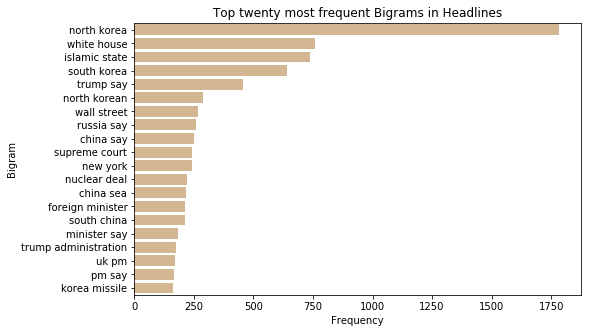

In [33]:
plt.figure(figsize=(8,5))

sns.barplot(y=freq_top_20['Bigram'],x=freq_top_20['Frequency'],color='burlywood').set_title("Top twenty most frequent Bigrams in Headlines")

### The bigrams give a better idea of what the headlines are about. We can see that mmost stories are about North Korea. Says is associates with mostly Trump, followed by Russia China -

In [34]:
freq['word_1']=freq['Bigram'].apply(lambda x:x.split()[0])
freq['word_2']=freq['Bigram'].apply(lambda x:x.split()[1])

In [45]:
G=nx.Graph()
nodes=list(freq['word_1'])
word_2=list(freq['word_2'])
nodes=nodes+word_2
nodes=list(set(nodes))
#print("Number of Nodes ", len(nodes))
for node in nodes:
    G.add_node(node)
#Add edges to the graph
for index, row in freq.iterrows():
    G.add_weighted_edges_from([(row['word_1'], row['word_2'], row['Frequency'])])
print("Number of Nodes in Graph ",G.number_of_nodes())
print("Number of Edges in Graph ",G.number_of_edges())

Number of Nodes in Graph  440
Number of Edges in Graph  483


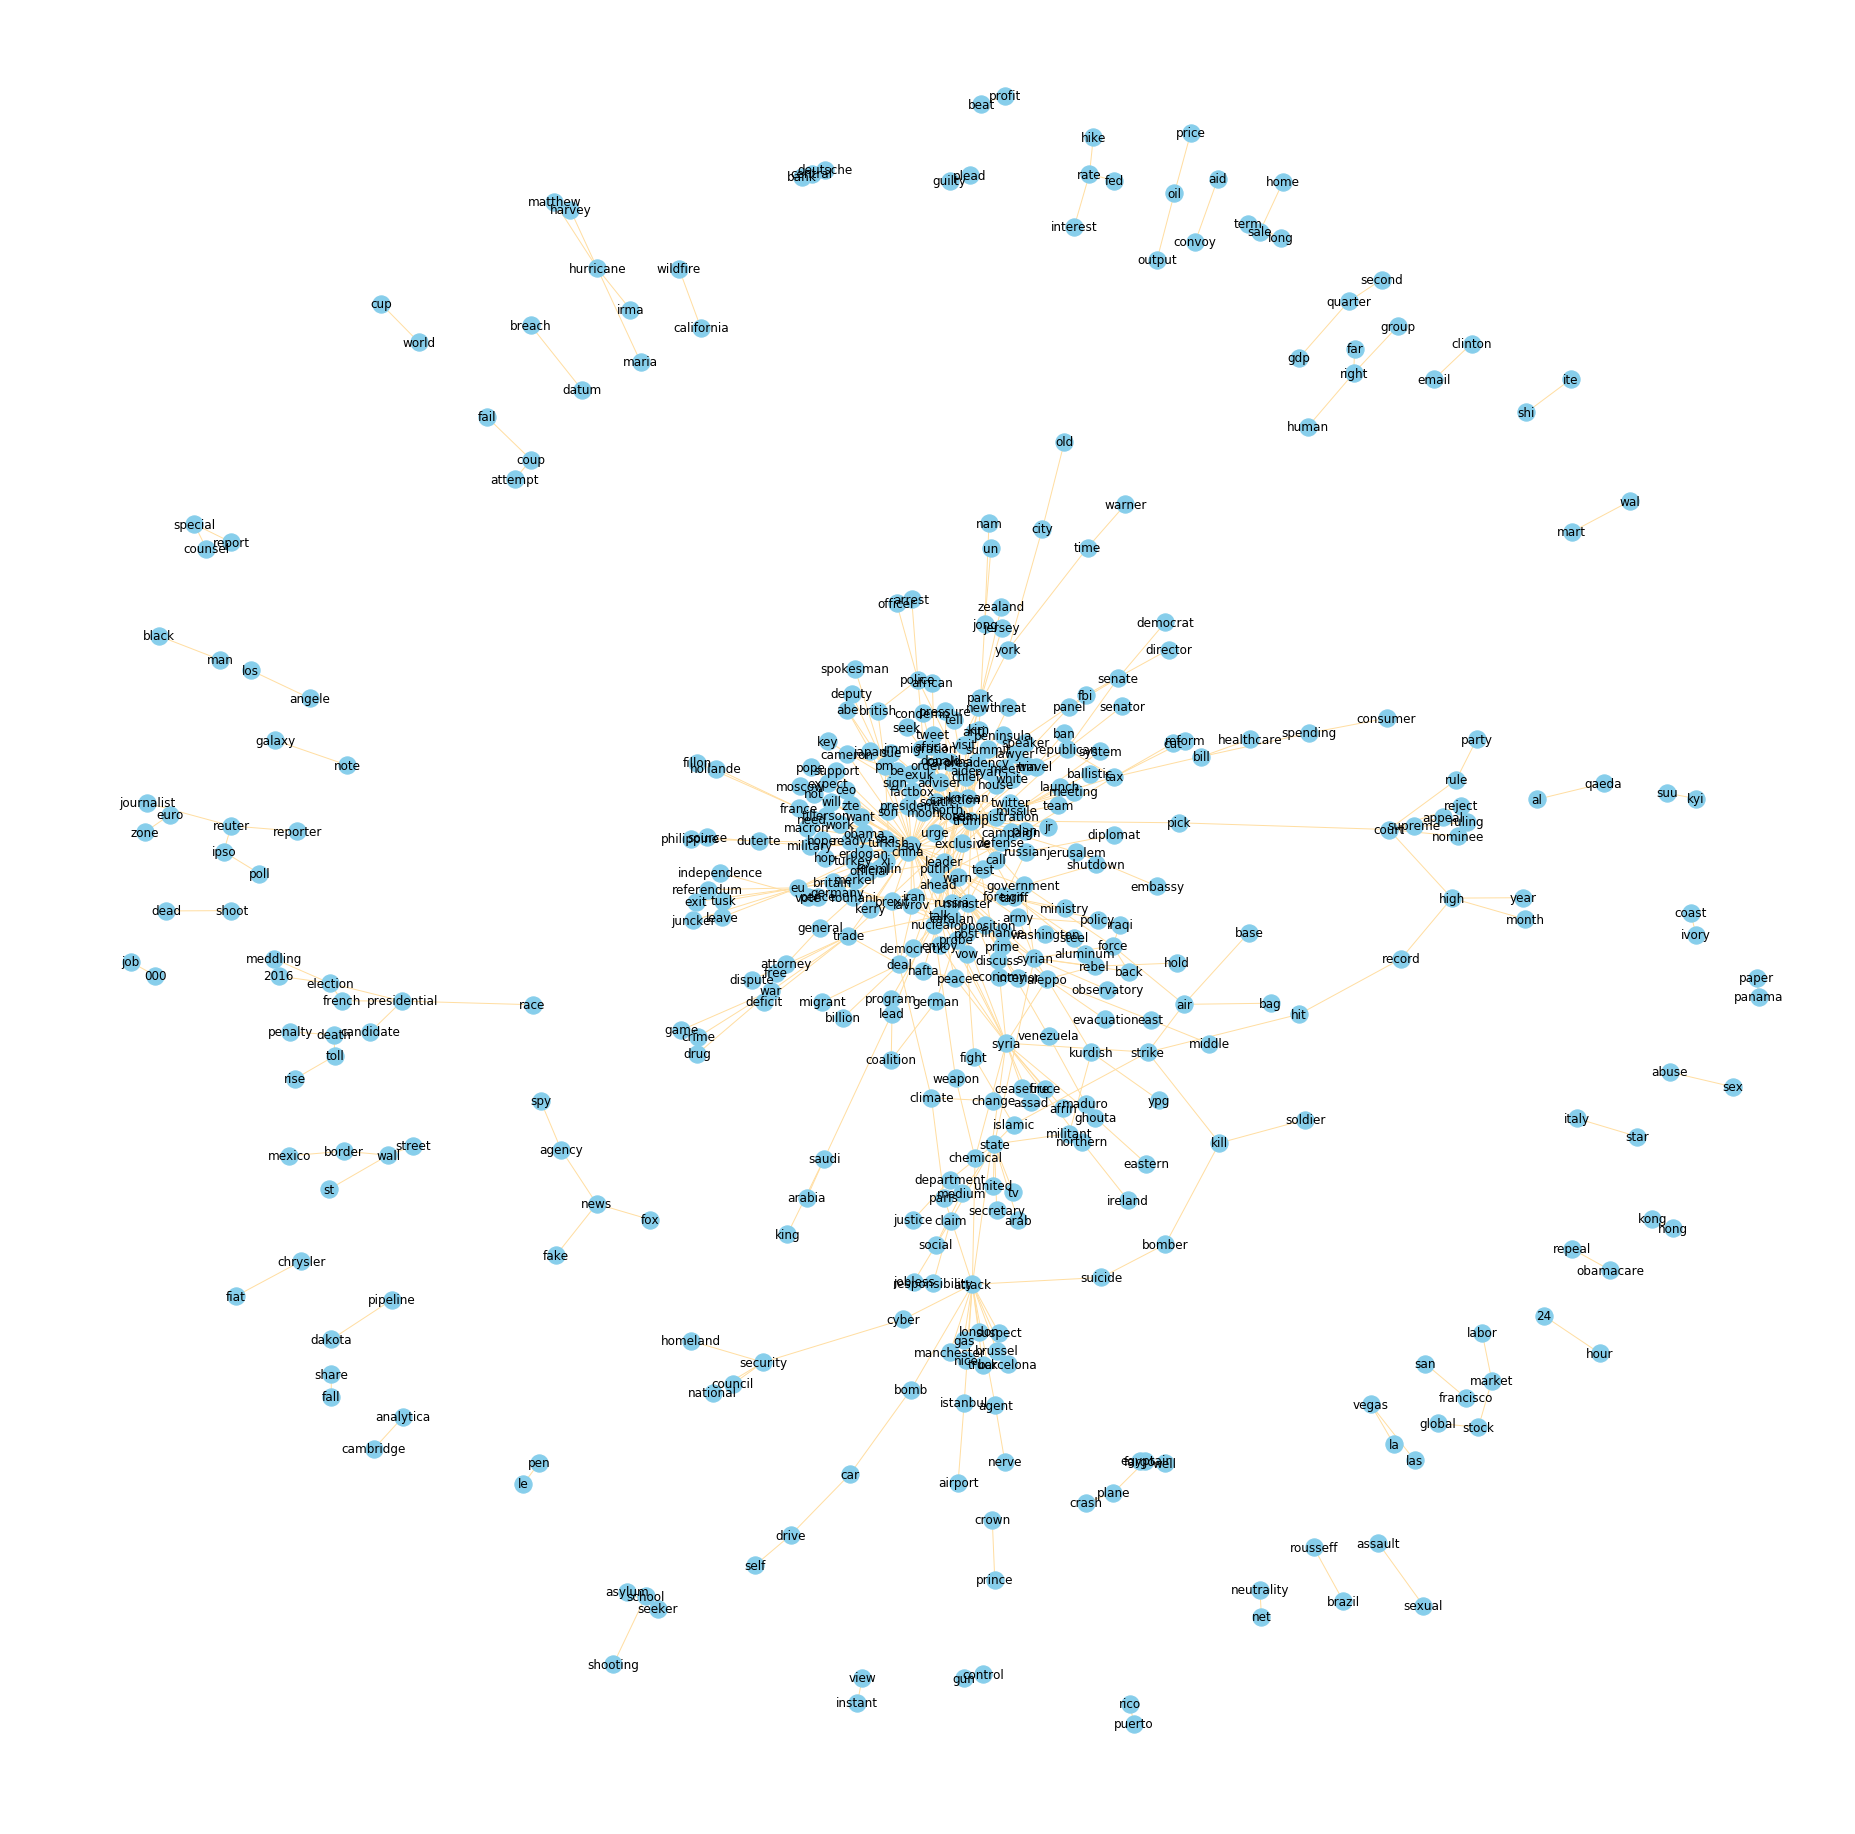

In [49]:
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G,node_color="skyblue",pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
#ax.collections[0].set_edgecolor("#555555") 
plt.show()

If you zoom into the graph, we can see on major cluster in the center and many disconnected clusters.There are few communities within the main cluster too, like one on "Home Land National Security Council"

### Building Word Embeddings using Word2Vec

Word2Vec model learns the context the word is used, which means it can differentiate between 'river Bank' and 'nationalised bank'. A BoW or a tf-idf model cannot dostinguish between the two occurrences of the word "Bank". Word2Vec uses a shallow Neural Network to learn the word embeddings. There are two methods of word2ve - skip gram and CBOW. skip gram predicts the context words given the term and CBOW predicts the term given the context words. We will use Skip Gram Approach to train word2Vec

In [8]:
import gensim
stories=news['Body'].tolist()
print("Before Preprocessing")
print(stories[0])
stories=[gensim.utils.simple_preprocess(story) for story in stories]
print("After Preprocessing")
print(stories[0])
#model = gensim.models.Word2Vec(documents)
    #model.train(documents, total_examples=len(documents), epochs=10)
 


Before Preprocessing
Dozens of students and parents from the Florida high school where 17 teens and staff members died in a shooting rampage boarded buses on Tuesday for a trip to the state capital Tallahassee to push for a ban on assault rifles. Last week’s massacre, the second-deadliest shooting at a public school in U.S. history, has inflamed a national debate about gun rights and prompted teens from Marjory Stoneman Douglas High School and across the United States to demand legislative action. The incident has galvanized advocates for stricter gun controls, including many survivors of the shooting. “I am not going back to school until lawmakers, and the president, change this law,” said Tyra Hemans, an 18-year-old senior, referring to Florida’s law permitting the sale of assault rifles. “Three people I looked to for advice and courage are gone but never forgotten, and for them, I am going to our state capital to tell lawmakers we are tired and exhausted of stupid gun laws.” Fourtee

In [4]:
model = Word2Vec(stories) # Take all words which oiccurs once (min_count)
model.wv.save_word2vec_format('model.bin')

In [5]:
model.wv.most_similar("trump")

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('obama', 0.717073917388916),
 ('clinton', 0.6739460229873657),
 ('sanders', 0.604189395904541),
 ('tillerson', 0.5997154712677002),
 ('pence', 0.5848588347434998),
 ('elect', 0.5817296504974365),
 ('bannon', 0.5521736741065979),
 ('republican', 0.5505566596984863),
 ('duterte', 0.5496161580085754),
 ('romney', 0.5486665964126587)]

### As we can see, the most similar word to Trump is Obama and Clinton.

In [6]:
model.wv.most_similar("russia")

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('moscow', 0.8774701952934265),
 ('ukraine', 0.7416144609451294),
 ('russian', 0.6960548162460327),
 ('kremlin', 0.6850188970565796),
 ('iran', 0.6803755760192871),
 ('putin', 0.6792380213737488),
 ('crimea', 0.6749544143676758),
 ('kiev', 0.6311656832695007),
 ('turkey', 0.6256614923477173),
 ('tehran', 0.6221721172332764)]

We can see Moscow which is the Capital of Russia most similar to "Russia". We also "Putin" in the words that occur in contexts similar to Russia

In [7]:
model.wv.most_similar("war")

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('conflict', 0.7538794875144958),
 ('wars', 0.6514263153076172),
 ('disobedience', 0.5672098398208618),
 ('confrontation', 0.5229598879814148),
 ('blooded', 0.5093176364898682),
 ('bloodshed', 0.5082775354385376),
 ('strife', 0.5014602541923523),
 ('clash', 0.4884064793586731),
 ('battle', 0.4849421977996826),
 ('crisis', 0.47602221369743347)]

The most similar words to wars are all related to violence, fighting conflict

In [80]:
model.wv.most_similar("rape")

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kidnapping', 0.7781679034233093),
 ('genocide', 0.7693054676055908),
 ('murders', 0.7580944299697876),
 ('murder', 0.7557733058929443),
 ('killings', 0.7534257173538208),
 ('treason', 0.7432597875595093),
 ('torture', 0.737384021282196),
 ('offences', 0.7298634052276611),
 ('misdemeanor', 0.729677677154541),
 ('arson', 0.7275093793869019)]

We can see other types of attacks like genocide and kidanpping occuring in similar context to rape

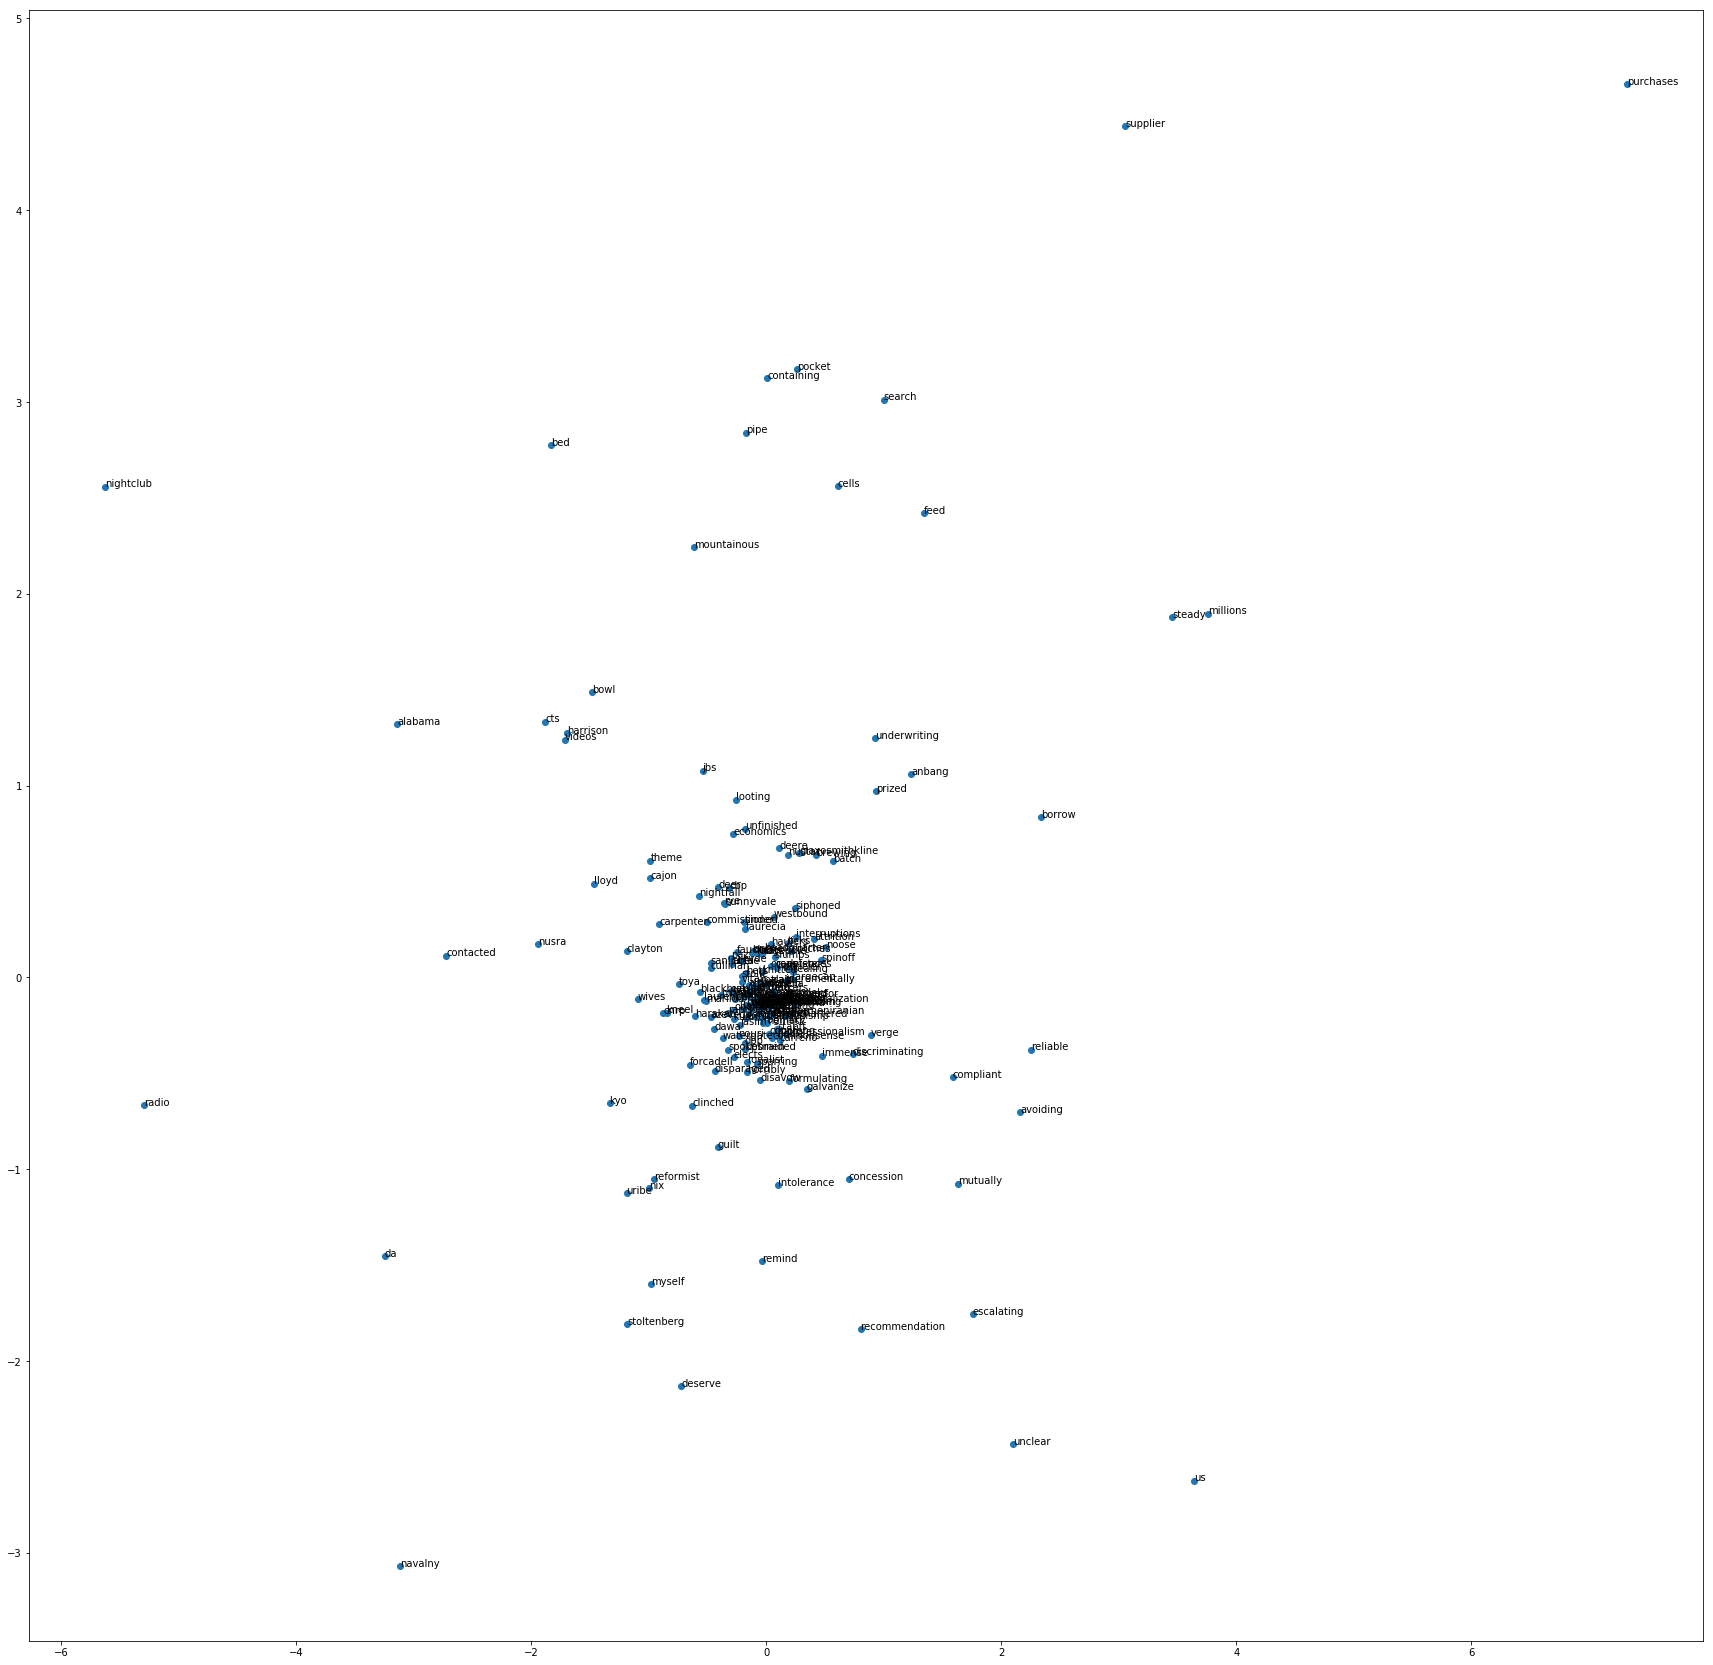

In [86]:
import random
random.seed(2)
X = model.wv[model.wv.vocab]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)
ind = random.sample(range(0,len(X)),200)

result_random = result[ind]
all_words = list(model.wv.vocab)
words = [all_words[i] for i in ind]
plt.figure(figsize=(30,30))
plt.scatter(result_random[:,0], result_random[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

In [90]:
model.wv.most_similar('money')

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('funds', 0.6843498349189758),
 ('cash', 0.6611287593841553),
 ('dollars', 0.6512625217437744),
 ('loans', 0.6191471815109253),
 ('payments', 0.5918813943862915),
 ('deposits', 0.584196925163269),
 ('billions', 0.5840731859207153),
 ('fees', 0.5791772603988647),
 ('taxpayers', 0.5783169269561768),
 ('savings', 0.5686666965484619)]

In [12]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [17]:
def display_closestwords_tsnescatterplot(model, word,dim_vector=100):
    
    arr = np.empty((0,dim_vector), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    plt.figure(figsize=(10,10))
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


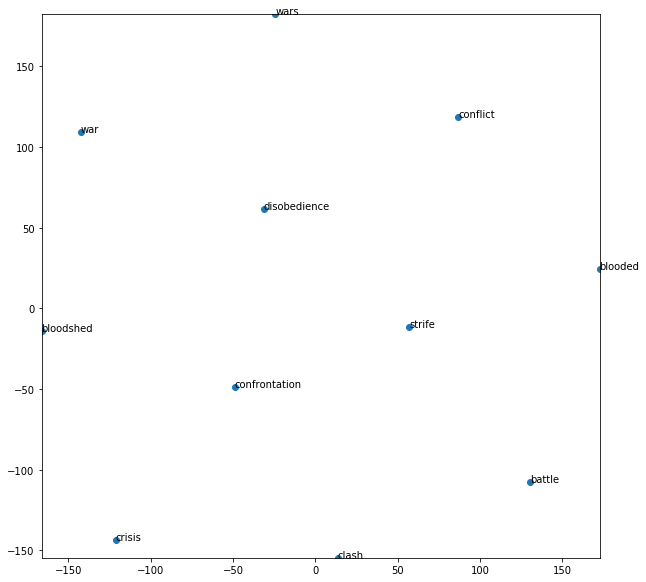

In [18]:
display_closestwords_tsnescatterplot(model,"war")

In [19]:
model_1=Word2Vec(stories,min_count=100)
model_1.wv.save_word2vec_format('model_min_count_100.bin')

In [22]:
print("Vocabulary Size of the Model, which has word that occur more than 50 times :",len(model_1.wv.vocab))

Vocabulary Size of the Model, which has word that occur more than 50 times : 9671


### Let use the model to calculate similarity between headlines of stories

In [37]:
model_1.wv.most_similar("fake")

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('false', 0.6479105949401855),
 ('breitbart', 0.6395250558853149),
 ('outlet', 0.6376582384109497),
 ('outlets', 0.6019152402877808),
 ('stories', 0.5760900378227234),
 ('articles', 0.575459361076355),
 ('leaked', 0.5435607433319092),
 ('inaccurate', 0.5412100553512573),
 ('ads', 0.5386123657226562),
 ('leaks', 0.5324280261993408)]

In [56]:
model_1.wv.most_similar(positive=['facebook','scandal'],negative=['cambridge'])

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('scandals', 0.49621862173080444),
 ('litigation', 0.452235609292984),
 ('twitter', 0.44108641147613525),
 ('controversy', 0.43810442090034485),
 ('crackdown', 0.43292397260665894),
 ('lawsuit', 0.4214931130409241),
 ('snapchat', 0.4151737093925476),
 ('instagram', 0.4075307846069336),
 ('yahoo', 0.40467751026153564),
 ('misconduct', 0.40430372953414917)]

In [57]:
model_1.wv.most_similar(positive=['king','woman'],negative=['man'])

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('prince', 0.6863346099853516),
 ('meghan', 0.6843637228012085),
 ('markle', 0.6721333861351013),
 ('monarch', 0.6519719362258911),
 ('crown', 0.6456228494644165),
 ('queen', 0.6310815215110779),
 ('harry', 0.624225914478302),
 ('cardinal', 0.6165363788604736),
 ('alwaleed', 0.6011507511138916),
 ('singer', 0.589593231678009)]

In [60]:
model_1.wv.most_similar(positive=['king','woman'],negative=['man'])

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('prince', 0.6863346099853516),
 ('meghan', 0.6843637228012085),
 ('markle', 0.6721333861351013),
 ('monarch', 0.6519719362258911),
 ('crown', 0.6456228494644165),
 ('queen', 0.6310815215110779),
 ('harry', 0.624225914478302),
 ('cardinal', 0.6165363788604736),
 ('alwaleed', 0.6011507511138916),
 ('singer', 0.589593231678009)]

In [61]:
### Let us increase the size of word vectors and see how this changes

In [62]:
model_2=model_1=Word2Vec(stories,min_count=100,size=200)
model_2.wv.save_word2vec_format('model_min_count_100_size200.bin')

In [63]:
model_2.wv.most_similar(positive=['king','woman'],negative=['man'])

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.6301696300506592),
 ('prince', 0.6278970837593079),
 ('meghan', 0.5940535664558411),
 ('monarch', 0.5886443257331848),
 ('salman', 0.5735467076301575),
 ('markle', 0.5661304593086243),
 ('harry', 0.5559298992156982),
 ('elizabeth', 0.5237827301025391),
 ('margaret', 0.516846776008606),
 ('actress', 0.5157610177993774)]

In [70]:
model_2.wv.most_similar(positive=['facebook'])

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('instagram', 0.6863079071044922),
 ('twitter', 0.6722086071968079),
 ('whatsapp', 0.6440730094909668),
 ('youtube', 0.6216167211532593),
 ('blog', 0.5988998413085938),
 ('telegram', 0.5729707479476929),
 ('google', 0.5711185336112976),
 ('zuckerberg', 0.5684460401535034),
 ('snapchat', 0.5674852132797241),
 ('linkedin', 0.5446396470069885)]

In [69]:
model_2.wv.most_similar(positive=['oil'])

/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('crude', 0.6791701912879944),
 ('lng', 0.6007250547409058),
 ('shale', 0.5972747802734375),
 ('soybean', 0.5523847341537476),
 ('grain', 0.5411415100097656),
 ('energy', 0.5277359485626221),
 ('refining', 0.5273506045341492),
 ('pipelines', 0.5249794721603394),
 ('drilling', 0.5244941115379333),
 ('commodity', 0.5203863382339478)]

### We can see other commodities being more similar to oil 

In [71]:
model_2.similarity('oil','stock')

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.31797263

In [72]:
model_2.similarity('oil','gas')

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.4259169

### To understand document similarity, let use extension of Word2Vec called the Doc2Vec. 

What doc2Vec does in addition to learning the word embeddings it also takes the doc embeddings. It is an extension of word2vec. Input is the word vectors as well as the document id.

In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [9]:
stories=news['Body']
tagged_data = [TaggedDocument(words=gensim.utils.simple_preprocess(_d), tags=[str(i)]) for i, _d in enumerate(stories)]

In [10]:
tagged_data[0]

TaggedDocument(words=['dozens', 'of', 'students', 'and', 'parents', 'from', 'the', 'florida', 'high', 'school', 'where', 'teens', 'and', 'staff', 'members', 'died', 'in', 'shooting', 'rampage', 'boarded', 'buses', 'on', 'tuesday', 'for', 'trip', 'to', 'the', 'state', 'capital', 'tallahassee', 'to', 'push', 'for', 'ban', 'on', 'assault', 'rifles', 'last', 'week', 'massacre', 'the', 'second', 'deadliest', 'shooting', 'at', 'public', 'school', 'in', 'history', 'has', 'inflamed', 'national', 'debate', 'about', 'gun', 'rights', 'and', 'prompted', 'teens', 'from', 'marjory', 'stoneman', 'douglas', 'high', 'school', 'and', 'across', 'the', 'united', 'states', 'to', 'demand', 'legislative', 'action', 'the', 'incident', 'has', 'galvanized', 'advocates', 'for', 'stricter', 'gun', 'controls', 'including', 'many', 'survivors', 'of', 'the', 'shooting', 'am', 'not', 'going', 'back', 'to', 'school', 'until', 'lawmakers', 'and', 'the', 'president', 'change', 'this', 'law', 'said', 'tyra', 'hemans', 'a

In [12]:
model = Doc2Vec(tagged_data)

In [18]:
tokens = news['Body'].tolist()[0].split()

new_vector = model.infer_vector(tokens)
sims = model.docvecs.most_similar([new_vector])

In [19]:
sims

[('0', 0.6865319013595581),
 ('34034', 0.6505800485610962),
 ('10966', 0.6446884870529175),
 ('35112', 0.641249418258667),
 ('24765', 0.6266165971755981),
 ('11084', 0.626432478427887),
 ('33683', 0.61751389503479),
 ('34584', 0.6165061593055725),
 ('33770', 0.6135478019714355),
 ('34223', 0.6123571395874023)]

### All the similar document stories are related to Florida Shooting incident